# Data Analysis: Avocado Price

Avodata represents weekly national (US) retail avocado sales data from 2015 to I-2018. The average price in the table reflects a cost per unit even when multiple units (avocados) are sold in bags. PLUs correspond to Product Lookup codes and comes from the retailer's register for Hass avocados only.

**Features**




1. Date - weekly dates from 2015 to 2018.
2. AveragePrice - average price of a single avocado.
3. Total Volume -  total number of avocados sold. 
4. 4046 - total number of avocados with PLU 4046 (Small Hass).
5. 4225 - total number of avocados with PLU 4225 (Large Hass).
6. 4770 - total number of avocados with PLU 4770 (XLarge Hass).
7. Total Bags -sum of the 3 bag sizes.
8. type - conventional or organic.
9. year - year of the observation.
10. region- city or region of the observation.


In [93]:
import pandas as pd 

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

import calendar

In [58]:
avodata =  pd.read_csv('C:/avocado.csv', index_col=0)
avodata.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


## Data Profiling

In the first column there is no row identifier, there is a reference related to a weekly report for each state, made up of 51 records each (51 weeks of the year). It is detected when using this column as an index and verifying that there are duplicates, so an automatic index is allowed. isnull() method shows that there are no missing data and that each column contains 18249 records.

In [3]:
avodata.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [21]:
avodata.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

## Data Preprocessing

Columns are renamed to improve readability. "Date" column which is recognized as object type is transformed to datetime type.

In [59]:
avodata= avodata.rename(index=str, 
                        columns={"4046" : "Small Hass", "4225" : "Large Hass","4770" : "XLarge Hass" })

In [60]:
avodata.Date = pd.to_datetime(avodata.Date)
avodata.sort_values(by=['Date'], inplace=True, ascending=True)

In [61]:
avodata.head()

,Date,AveragePrice,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


## Data Analysis

There are two types of avocados: organic and conventional, exploratoryly it is observed that the price of organic type avocados is higher. 

In [8]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}

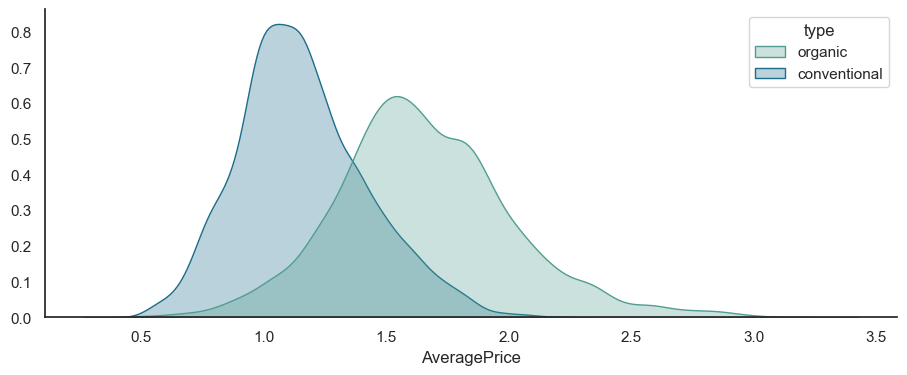

In [15]:
plt.figure(figsize=(11,4))
sns.set_theme(style="white", rc=custom_params)
sns.kdeplot(data=avodata, x = 'AveragePrice', hue='type', fill=True, alpha=0.3, palette="crest")
plt.ylabel('')
plt.show()

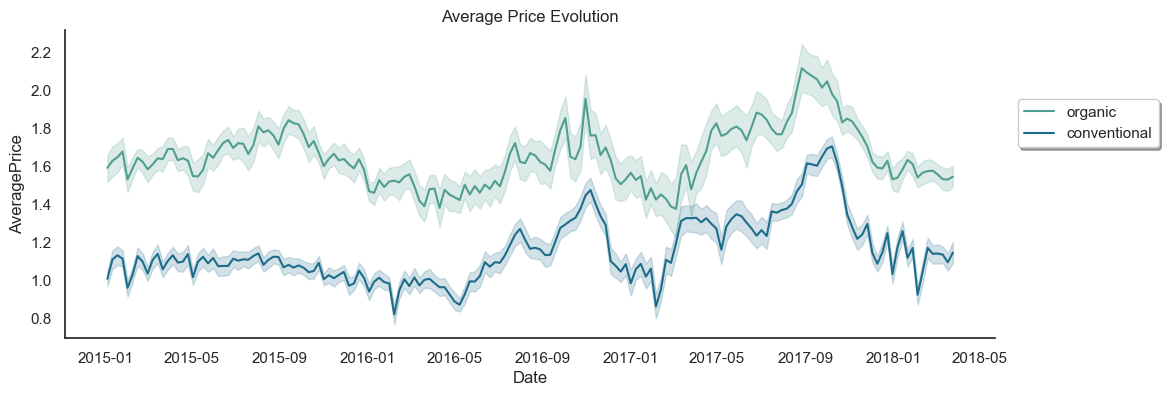

In [14]:
plt.figure(figsize=(12,4))
sns.lineplot(x = 'Date', y = 'AveragePrice', hue="type", data=avodata, palette="crest")
plt.ticklabel_format(style='plain', axis='y')
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 0.8), shadow=True, ncol=1)
plt.title('Average Price Evolution')
plt.show()

In the season corresponding to the end and beginning of the year (16-17/ 17-18) there is an increase and subsequent fall in prices at the same time as there is an increase in the number of avocados sold. In other words, there is more demand for avocados at the beginning of the year represented by an increase in sales and accompanied by a drop in prices.

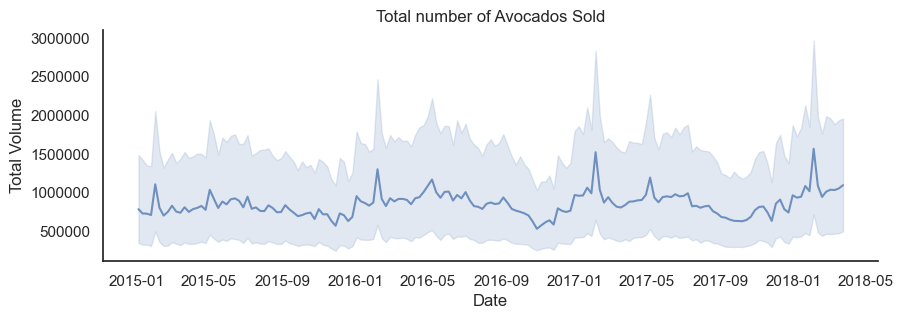

In [22]:
plt.figure(figsize=(10,3))
#sns.set_theme(style="white", rc=custom_params, palette="vlag")
sns.lineplot(x = 'Date', y = 'Total Volume', data=avodata)
plt.ticklabel_format(style='plain', axis='y')
#plt.xticks(rotation=45)
plt.title('Total number of Avocados Sold')
plt.show()

### Regional and Seasonal Analysis

The 'TotalUS' record represents the sum of the total of all states for each of the weeks. This data from the dataset is filtered to prevent it from giving a totalizing result

In [62]:
filter1=avodata.region!='TotalUS'
avo=avodata[filter1]
avo_bar = avo.groupby('region')['Total Volume'].sum().sort_values(ascending = False).reset_index()

#### Sales volume by region 

In [65]:
avo_bar['Eng_percent'] = (avo_bar['Total Volume'] / 
                          avo_bar['Total Volume'].sum()) * 100

In [66]:
threshold = 2
remaining = avo_bar.loc[avo_bar['Eng_percent'] < threshold].sum(axis = 0)
avo_bar = avo_bar[avo_bar ['Eng_percent'] >= threshold]
avo_bar = pd.concat([avo_bar,remaining.to_frame().T],ignore_index=True )
avo_bar.at[13,'region']='Remaining'


In [74]:
colors = ['#0034E2','#0055D4','#0071C6','#008DB8','#00AAAA','#00C69C','#00E28E','#001CF0','#00FF80','#191970',]
explode = (0.01, 0.01, 0.01, 0.03, 0.1, 0.1, 0.1, 0.2, 0.2, 0.3, 0.4, 0.5, 0.6, 0.01)

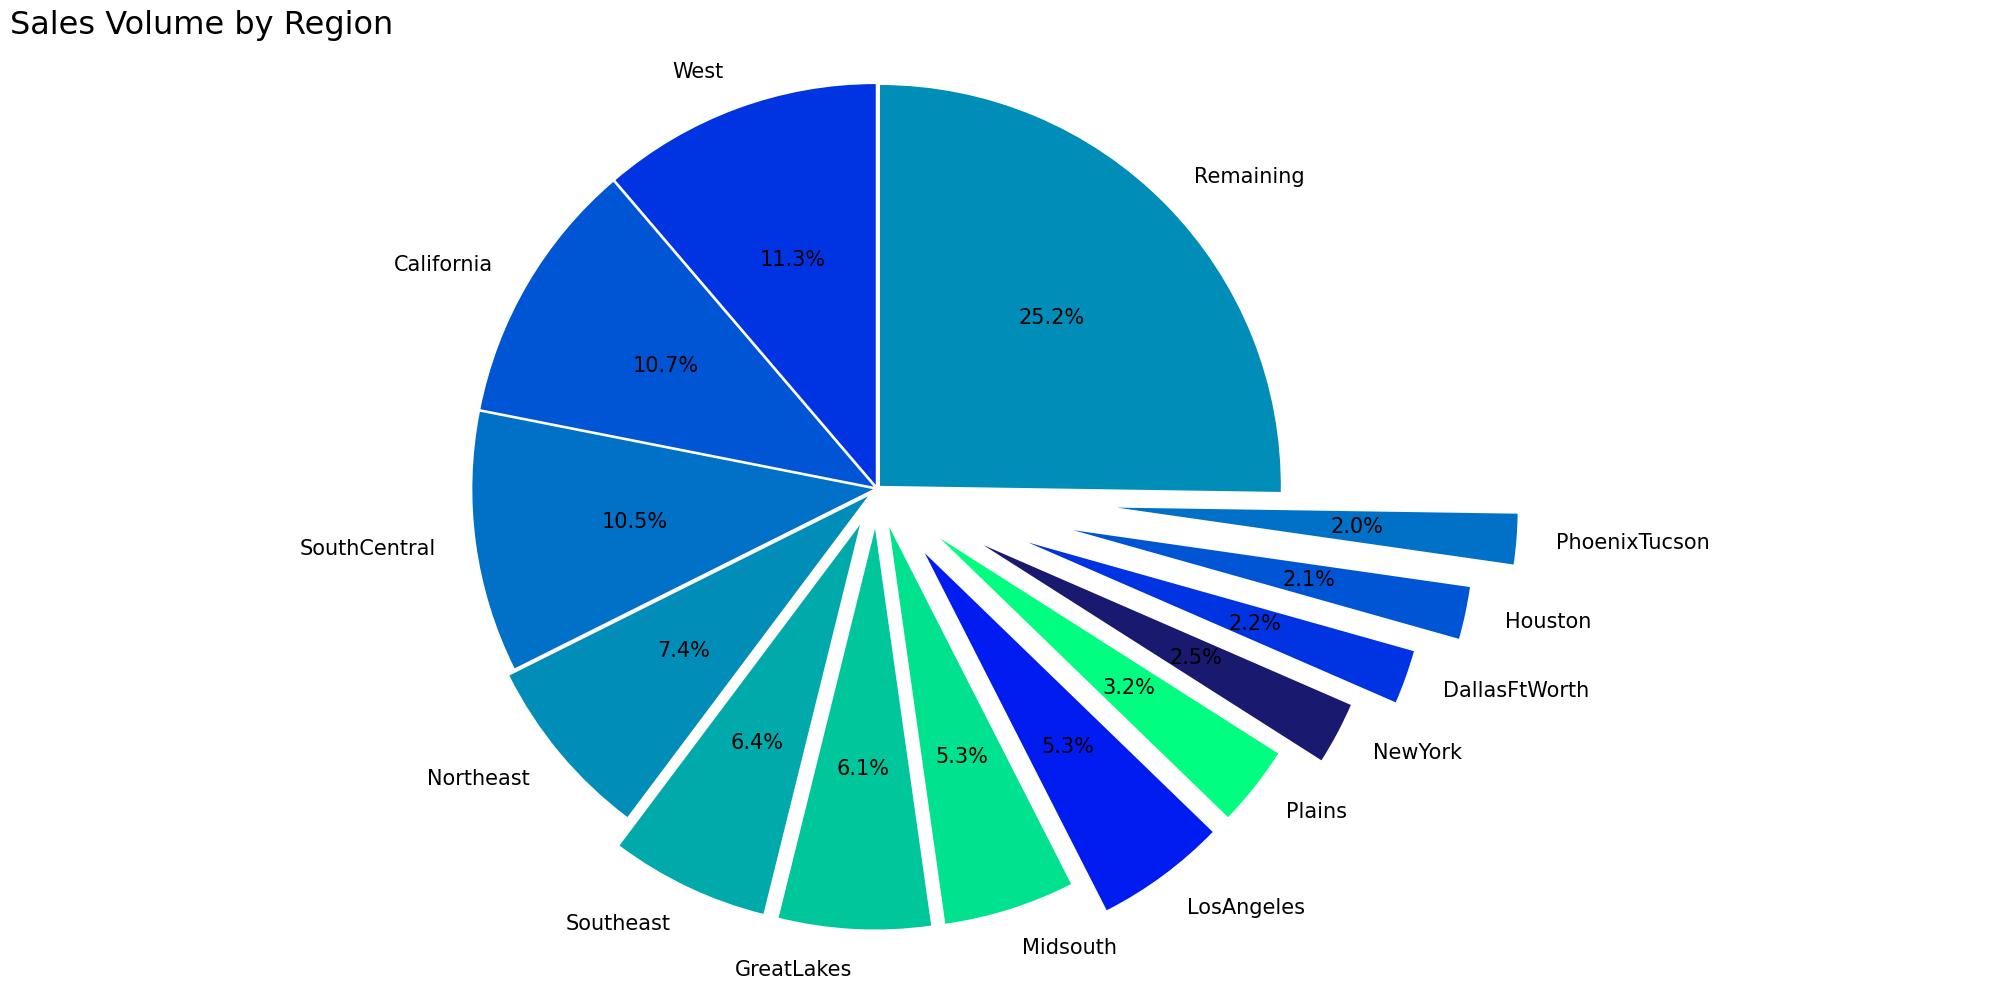

In [75]:
plt.figure(figsize=(20,10))
plt.pie(x = avo_bar['Total Volume'], labels= avo_bar.region, colors=colors, explode=explode,
        shadow = False, startangle = 90 , autopct = '%1.1f%%', textprops={'fontsize':15})
plt.title("Sales Volume by Region", fontsize = 23, loc="left")
plt.axis('equal')
plt.tight_layout()
plt.show()

In total, 53 states are listed. The percentage of sales by region is plotted using the 13 states(regions) with the highest sales volumes, the remaining data is grouped in the 'Remaining' field.

#### Average annual sales volume

In [76]:
avodata['month'] = avodata['Date'].dt.month 
avodata['month'] = avodata['month'].apply(lambda x: calendar.month_abbr[x])
a =avodata.groupby(["year", "month"]).sum("Total Volume").reset_index()

In [79]:
df_2015 = a.loc[0:11, ['month', 'year', 'Total Volume']]
df_2016 = a.loc[12:23, ['month', 'year', 'Total Volume']]
df_2017 = a.loc[24:35, ['month', 'year', 'Total Volume']]
df_2018 = a.loc[36:40, ['month', 'year', 'Total Volume']]

In [81]:
month = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df_2015['month'] = pd.Categorical(df_2015['month'], categories=month, ordered=True)
df_2015.sort_values(by='month',inplace=True)

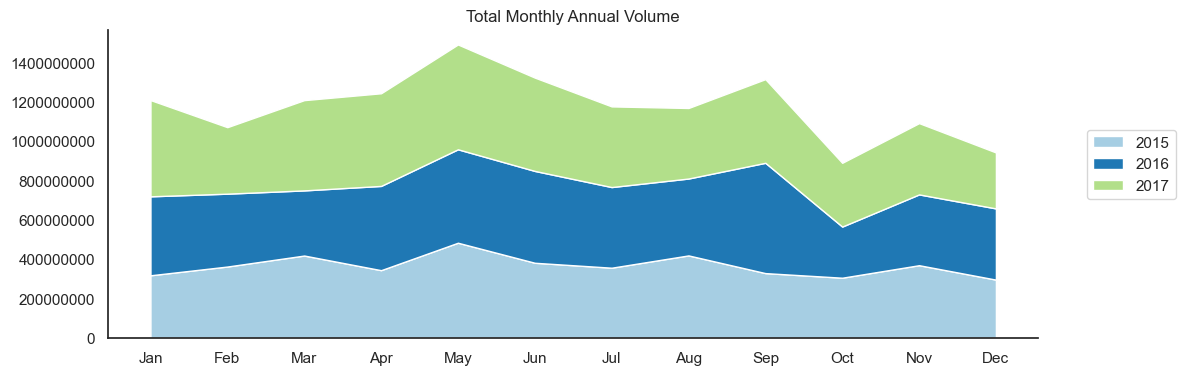

In [86]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
plt.figure(figsize=(12,4))
sns.set_theme(style="white",  rc=custom_params, palette="Paired")
plt.stackplot(df_2015.month, df_2015['Total Volume'], df_2016['Total Volume'], df_2017['Total Volume'], labels=['2015', '2016', '2017'])
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 0.7))
plt.ticklabel_format(style='plain', axis='y') 
plt.title('Total Monthly Annual Volume')
plt.show()

For all the years of the sample, it is observed that the peak of sales is in the month of May, in second place September, contracting for the month of October. This corresponds to the fall in prices at the end of the year that was found in the exploratory analysis of the data. The volume of avocados sold has remained relatively stable since November.

####  Price by region

In [87]:
avo_bar2 = avo.groupby(['region', 'type'])['AveragePrice'].mean().sort_values(ascending = False).reset_index()
y = avo_bar2.pivot(index='region', 
                   columns=['type'], 
                   values=['AveragePrice'])
                   


,region,type,AveragePrice
0,HartfordSpringfield,organic,2.229231
1,SanFrancisco,organic,2.211243
2,NewYork,organic,2.053018
3,Sacramento,organic,1.969172
4,Charlotte,organic,1.936982


In [89]:
y = y.sort_values(by=[('AveragePrice', 'conventional')], ascending=False)
xy = y.sort_values(by=[ ('AveragePrice',      'organic')], ascending=False)

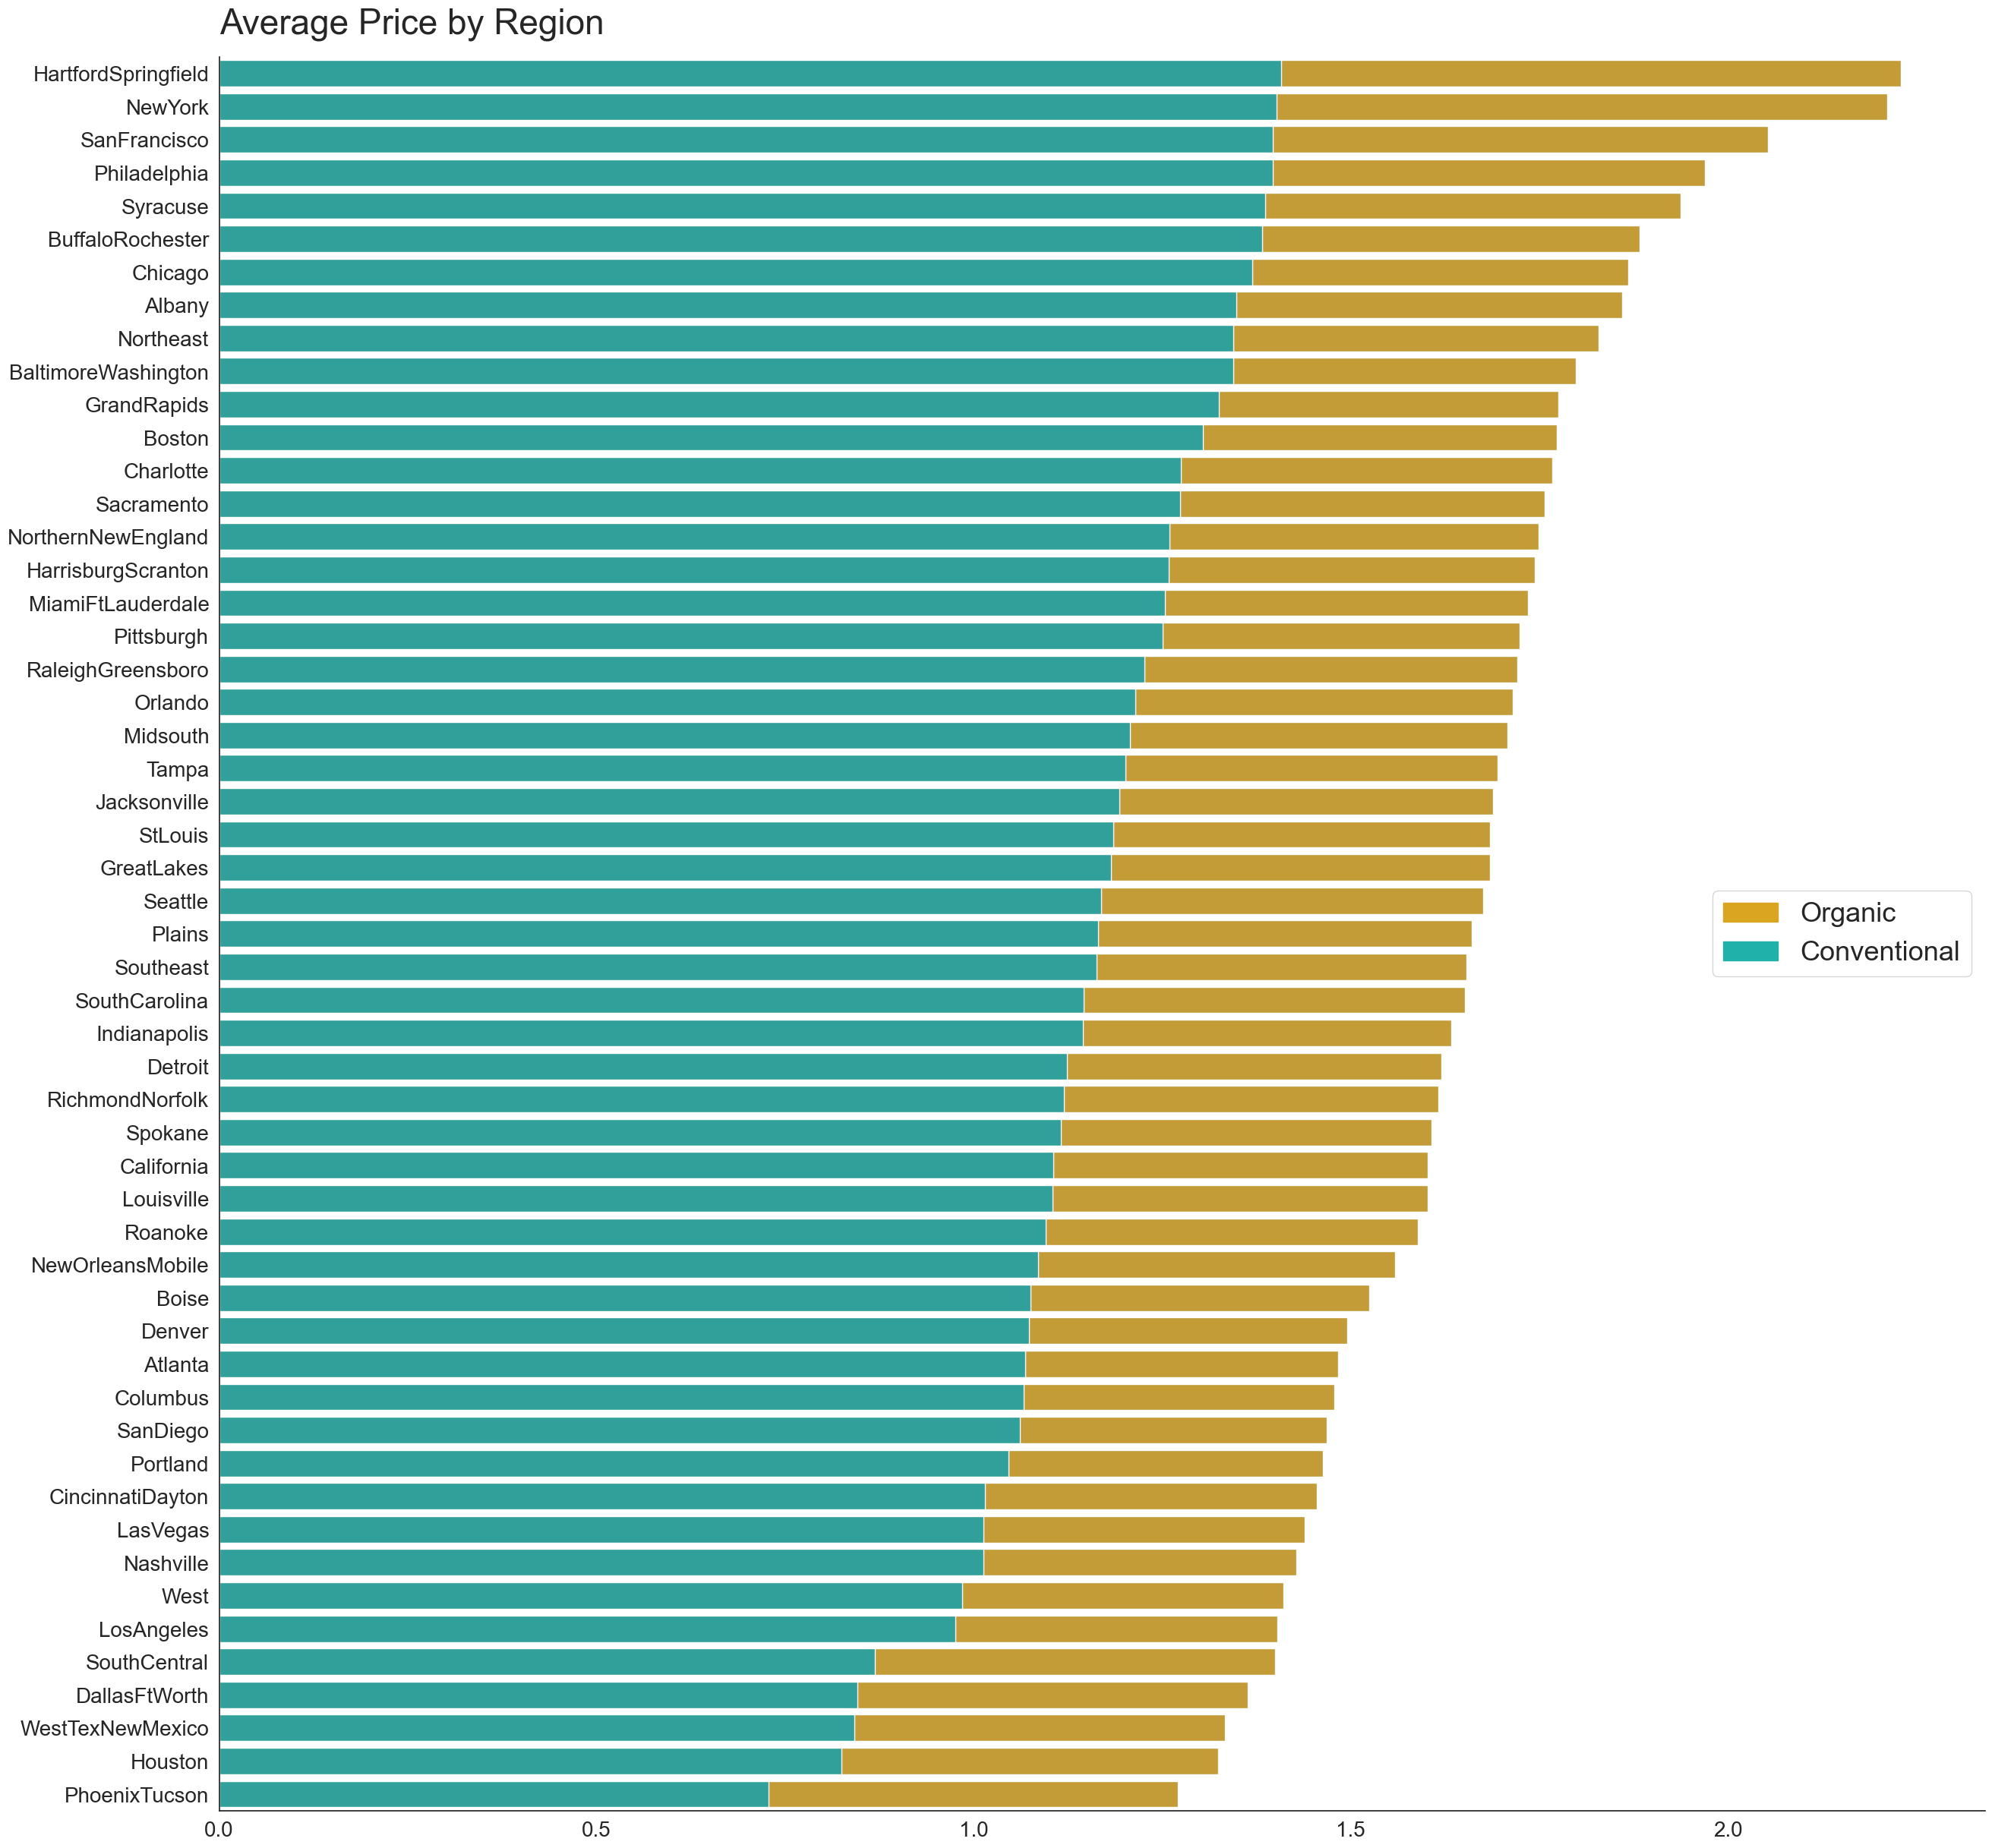

In [94]:
plt.figure(figsize=(30,30))
bar2 = sns.barplot(y= y.index, x = ('AveragePrice', 'organic'), data=xy, color = 'goldenrod')
bar1 = sns.barplot(y= y.index, x = ('AveragePrice', 'conventional'), data=y, color = 'lightseagreen')

plt.title("Average Price by Region", fontsize = 33, loc="left", y = 1.01)
bar2.set(ylabel=None, xlabel=None)
bar2.tick_params(axis='both', labelsize=20)
bar2.spines['right'].set_visible(False)

top_bar = mpatches.Patch(color='goldenrod', label=('Organic'))
bottom_bar = mpatches.Patch(color='lightseagreen', label=('Conventional'))
plt.legend(handles=[top_bar, bottom_bar], fontsize=26, loc = 'center right')

plt.show()

#### Monthly average price (organic - conventional) 

In [96]:
avodata['month'] = avodata['Date'].dt.month #Crea un nueva columna con los meses (1-12)
avodata['month'] = avodata['month'].apply(lambda x: calendar.month_abbr[x])

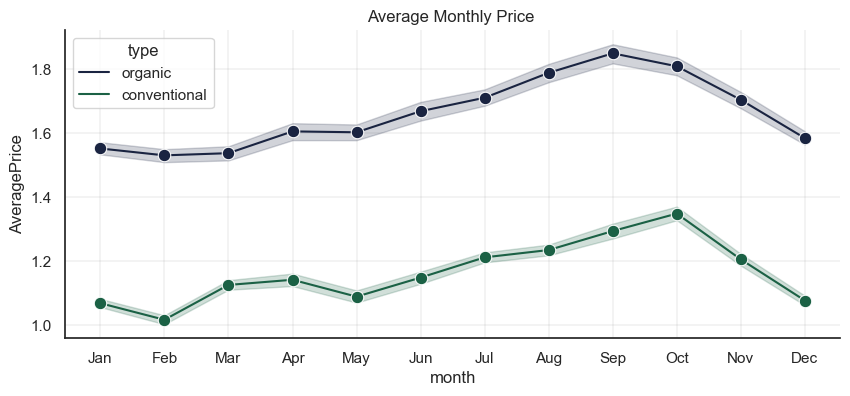

In [98]:
plt.figure(figsize=(10,4))
sns.set_theme(style="white",  rc=custom_params, palette="cubehelix")
ax = sns.lineplot(data=avodata, x='month', y='AveragePrice', hue='type',
    marker='o', markersize=9)#,  color='skyblue')
plt.title('Average Monthly Price ')
ax.grid(color='grey', linestyle='-', linewidth=0.15, alpha=0.9)
plt.show()

As initially assumed, the price tends to increase in the last quarter of the year to fall in the season at the beginning of the year. The two types of avocado behave in a similar way.

#### Annual price variation

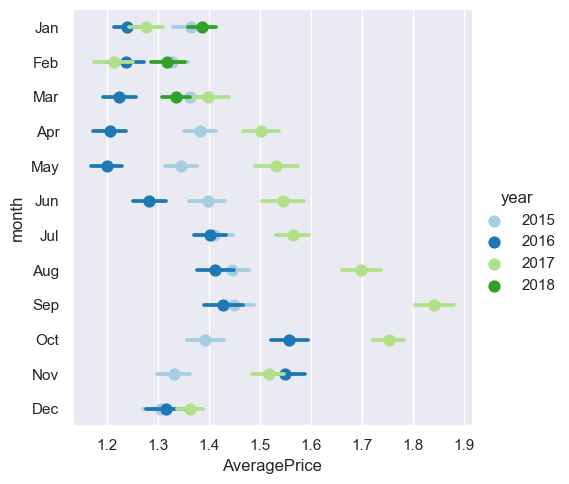

In [102]:
sns.set_style("darkgrid")
sns.catplot(x ='AveragePrice', y ='month', hue='year', kind='point', 
            data=avodata, join=False, palette='Paired', height=5) 
plt.show()

In the period April to September 2017, the highest prices of the entire sample are observed.